# ADULT DATA ANALYSIS- 
   

## Importing Required Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Reading dataset 

In [59]:
d=pd.read_excel("adult_test.xlsv")
d.shape
d = d.replace('?', np.nan)   ## replacing emptyvalue with NAN
d[pd.isnull(d).any(axis=1)]  ## to know about null values in entire dataset

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
5,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
7,29,NaN,227026.0,HS-grad,9.0,Never-married,NaN,Unmarried,Black,Male,0.0,0.0,40.0,United-States,<=50K.
14,58,NaN,299831.0,HS-grad,9.0,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,35.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16209,21,NaN,212661.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
16240,73,NaN,144872.0,HS-grad,9.0,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,25.0,Canada,<=50K.
16252,81,NaN,26711.0,Assoc-voc,11.0,Married-civ-spouse,NaN,Husband,White,Male,2936.0,0.0,20.0,United-States,<=50K.
16266,50,Local-gov,139347.0,Masters,14.0,Married-civ-spouse,Prof-specialty,Wife,White,Female,0.0,0.0,40.0,NaN,>50K.


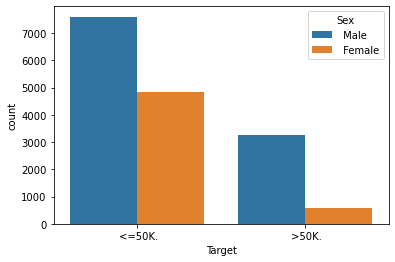

In [61]:
## EDA
sns.countplot(x='Target', hue='Sex', data=d)

In [36]:
d1=d.dropna() ## dropping  nan values
d1.shape

(15059, 15)

In [37]:
catg_values=['Workclass','Education','Martial_Status','Occupation','Relationship','Race','Sex','Country']
target_column=['Target']

## Finding unique values in each column

In [38]:
def unique_val(columns):
    for col in columns:
        
        unique_list=d1[col].unique().tolist()
        total=len(unique_list)
        print("there are" , total , "values in " + col, unique_list)
    
unique_val(catg_values)
unique_val(target_column)
    
    

there are 7 values in Workclass [' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov', ' State-gov', ' Self-emp-inc', ' Without-pay']
there are 16 values in Education [' 11th', ' Assoc-acdm', ' Some-college', ' 10th', ' Prof-school', ' 7th-8th', ' HS-grad', ' Bachelors', ' Masters', ' 5th-6th', ' Assoc-voc', ' 9th', ' Doctorate', ' 12th', ' 1st-4th', ' Preschool']
there are 7 values in Martial_Status [' Never-married', ' Married-civ-spouse', ' Widowed', ' Separated', ' Divorced', ' Married-spouse-absent', ' Married-AF-spouse']
there are 14 values in Occupation [' Machine-op-inspct', ' Protective-serv', ' Other-service', ' Prof-specialty', ' Craft-repair', ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales', ' Priv-house-serv', ' Farming-fishing', ' Transport-moving', ' Handlers-cleaners', ' Armed-Forces']
there are 6 values in Relationship [' Own-child', ' Husband', ' Not-in-family', ' Unmarried', ' Wife', ' Other-relative']
there are 5 values in Race [' Black', ' W

In [39]:
d1=d1.drop(['Education_Num'], axis=1)

In [40]:
def convtoint(columns):
    
    for column in columns:
        unq_val = d1[column].unique().tolist()
        dic = {}
        for indx, val in enumerate(unq_val):
            dic[val]=indx
        d1[column] = d1[column].map(dic).astype(int)
        print(column + " done!")
convtoint(target_column)
unique_val(target_column)

Target done!
there are 2 values in Target [0, 1]


In [41]:

def convt_to_1hot(data,columns):
    
    dummies = pd.get_dummies(data[columns])
    data = data.drop(columns, axis=1)
    data = pd.concat([data, dummies], axis=1)
    return data

In [42]:
d1=convt_to_1hot(d1,catg_values)

In [43]:
d1.head()

,Age,fnlwgt,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
1,25,226802.0,0.0,0.0,40.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,28,336951.0,0.0,0.0,40.0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,44,160323.0,7688.0,0.0,40.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,34,198693.0,0.0,0.0,30.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8,63,104626.0,3103.0,0.0,32.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Normalizing

In [44]:
normalize_columns = ['Age','fnlwgt','Capital_Gain','Capital_Loss','Hours_per_week']

In [45]:
def show_values(columns):
    for column in columns:
        max_val = d1[column].max()
        min_val = d1[column].min()
        mean_val = d1[column].mean()
        var_val = d1[column].var()
        print(column +': values=['+str(min_val)+','+str(max_val)+'] , mean='+str(mean_val)+' , var='+str(var_val))

In [46]:

show_values(normalize_columns)

Age: values=[17,90] , mean=38.76837771432366 , var=179.0543300217533
fnlwgt: values=[13492.0,1490400.0] , mean=189622.9976758085 , var=11154608853.460924
Capital_Gain: values=[0.0,99999.0] , mean=1120.3759877813932 , var=59342867.838308
Capital_Loss: values=[0.0,3770.0] , mean=89.04781193970383 , var=165076.51092940944
Hours_per_week: values=[1.0,99.0] , mean=40.950992761803576 , var=145.51612648813855


In [47]:
from sklearn import preprocessing
def normalize(columns):
    scaler = preprocessing.StandardScaler()
    d1[columns] = scaler.fit_transform(d1[columns])
normalize(normalize_columns)
show_values(normalize_columns)

Age: values=[-1.6268520945526854,3.82877737223121] , mean=-1.344741879883316e-16 , var=1.0000664098818084
fnlwgt: values=[-1.6677196365581874,12.316579013265338] , mean=-4.8647364552686733e-17 , var=1.0000664098817877
Capital_Gain: values=[-0.1454433762004148,12.836084553067497] , mean=-3.3555143597044543e-16 , var=1.000066409881662
Capital_Loss: values=[-0.21917702729752797,9.06007840764998] , mean=9.004462403587098e-16 , var=1.0000664098820617
Hours_per_week: values=[-3.3119702968147093,4.812310644663171] , mean=1.4612271962328575e-17 , var=1.0000664098817107


In [48]:
d1.head()

,Age,fnlwgt,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
1,-1.028975,0.352034,-0.145443,-0.219177,-0.078838,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.804771,1.394995,-0.145443,-0.219177,-0.078838,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.390983,-0.277431,0.852586,-0.219177,-0.078838,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,-0.356363,0.085881,-0.145443,-0.219177,-0.907846,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8,1.810942,-0.804805,0.257377,-0.219177,-0.742045,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
from sklearn.model_selection import train_test_split

x = d1.drop('Target',axis=1)
y = d1['Target']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,shuffle=True)


# Fitting Model

In [50]:
from sklearn.linear_model import LogisticRegression


In [51]:
model=LogisticRegression()

In [52]:
model.fit(x,y)

C:\Users\Ramesh kumar\anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
model.score(x,y)

0.849658011820174

In [54]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [55]:
model.fit(x,y)

DecisionTreeClassifier()

# Score

In [56]:
model.score(x,y)

0.9999335945281891